# Customizing Colorbars

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\4184164334.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


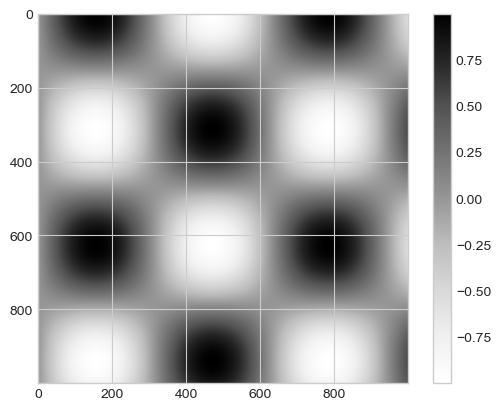

In [2]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

# A. Customizing Colorbars

* The colormap can be specified using the `cmap` argument to the plotting function that is creating the visualization

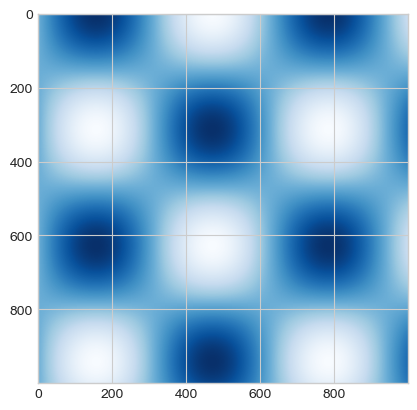

In [3]:
plt.imshow(I, cmap='Blues');

### A.1. Choosing the Colormap

* 3 Different categories of colormaps:
    * Sequential Colormaps
        * These are made up of one continuous sequence of colors (e.g., `binary` or `viridis`).
    
    * Divergent Colormaps
        * These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`).

    * Qualitative Colormaps
        * These mix colors with no particular sequence (e.g., `rainbow` or `jet`).

In [4]:
from matplotlib.colors import LinearSegmentedColormap

In [5]:
def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""

    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))

    # Convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]

    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)

    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\713316701.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\713316701.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


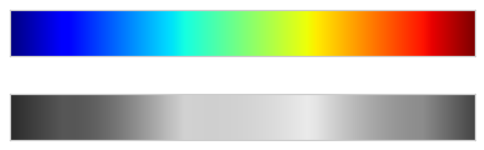

In [6]:
view_colormap('jet')

C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\713316701.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\713316701.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


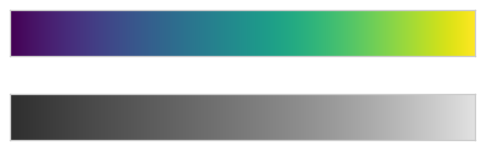

In [7]:
view_colormap('viridis')

C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\713316701.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)
C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\713316701.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


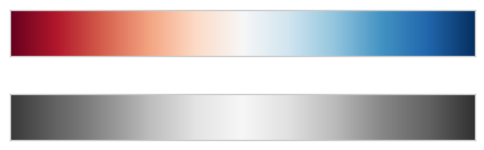

In [8]:
view_colormap('RdBu')

### A.2. Color Limits and Extensions

* The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the extend property.

In [9]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ...,  0.44228718,
         0.44940242,  0.45647263]])

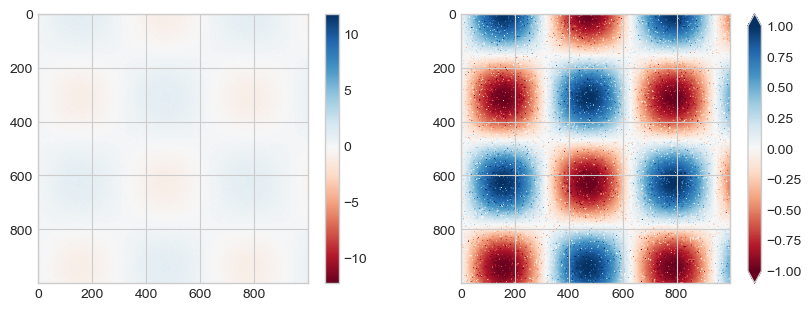

In [11]:
plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')

plt.clim(-1, 1)

### A.3. Discrete Colorbars:

* Colormaps are by default continuous, but sometimes you’d like to represent discrete values. 
    * The easiest way to do this is to use the `plt.cm.get_cmap` function and pass the name of a suitable colormap along with the number of desired bins

C:\Users\JCA\AppData\Local\Temp\ipykernel_26824\3119515715.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))


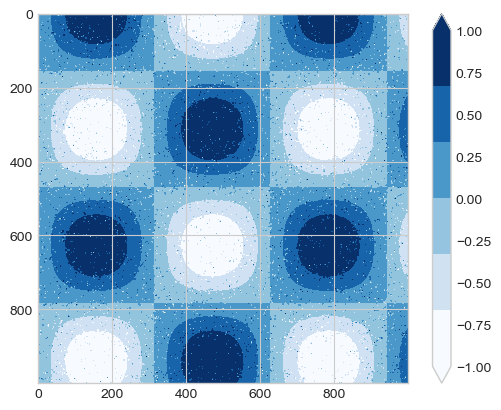

In [12]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar(extend='both')
plt.clim(-1, 1);

# B. Example: Handwritten Digits


In [13]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

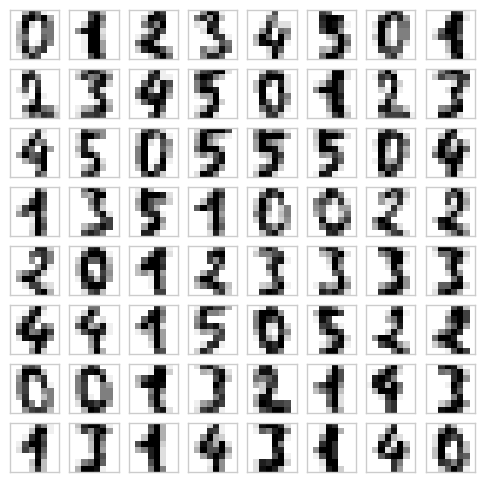

In [14]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [15]:
# project the digits into 2 dimensions using Isomap
from sklearn.manifold import Isomap

iso = Isomap(n_components=2, n_neighbors=15)
projection = iso.fit_transform(digits.data)


In [17]:
import matplotlib as mpl

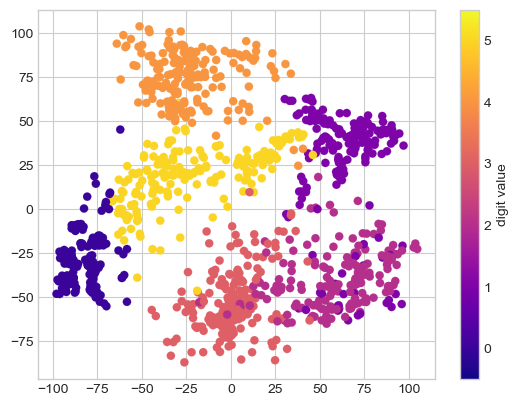

In [22]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, 
            cmap= mpl.colormaps.get_cmap('plasma')
            #cmap=plt.cm.get_cmap('plasma', 6)
            )
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)